# DataCamp course notes

## Introduction to Data Visualization with Python: 

### Statistical plots with Seaborn


This is a high-level tour of the Seaborn plotting library for producing statistical graphics in Python. The tour covers Seaborn tools for computing and visualizing linear regressions as well as tools for visualizing univariate distributions (e.g., strip, swarm, and violin plots) and multivariate distributions (e.g., joint plots, pair plots, and heatmaps). This also includes a discussion of grouping categories in plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto = pd.read_csv('https://assets.datacamp.com/production/course_1761/datasets/auto-mpg.csv')

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null int64
origin    392 non-null object
name      392 non-null object
color     392 non-null object
size      392 non-null float64
marker    392 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 36.8+ KB


In [4]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [5]:
auto['make'] = auto.name.str.split().str[0]

In [6]:
auto.head(3)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker,make
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o,ford
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o,hi
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x,honda


In [7]:
auto['origin'] = auto.origin.astype('category')
auto['color'] = auto.color.astype('category')
auto['marker'] = auto.marker.astype('category')
auto['make'] = auto.make.astype('category')

# Simple Linear Regression Model

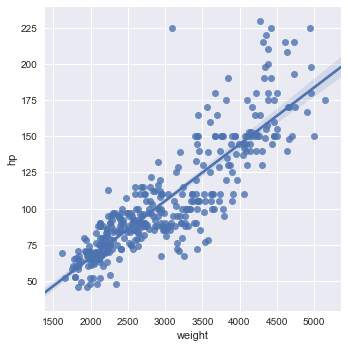

In [8]:
sns.lmplot(x='weight', y='hp', data=auto)
plt.show()

# Plotting residuals of a regression

Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data.

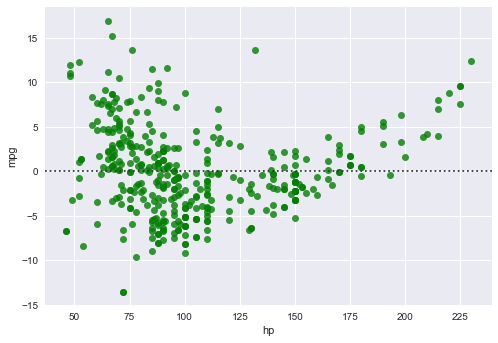

In [9]:
sns.residplot(x='hp', y='mpg', data=auto, color='green')
plt.show()

# Higher-order regressions

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables.



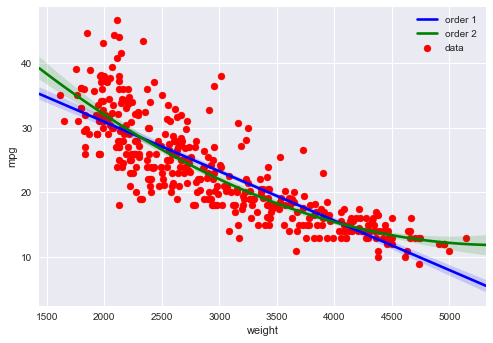

In [10]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

# Grouping linear regressions by hue

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.



   weight   hp  origin
0    3139   88      US
1    4732  193      US
2    1800   60    Asia
3    3525   98      US
4    2188   78  Europe


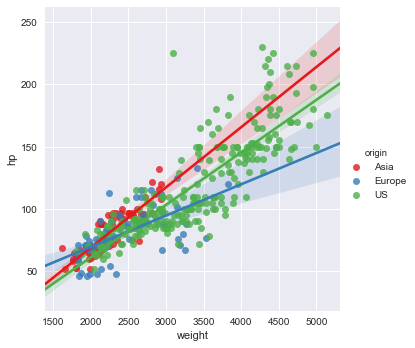

In [11]:
#Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp', data=auto, hue='origin', palette='Set1')

# Print head of 'weight', 'hp','origin' columns.
print(auto[['weight','hp','origin']].head())

# Display the plot
plt.show()

# Plot unique column data in seperate plots usging the 'row=' parameter on the 'origin' column.

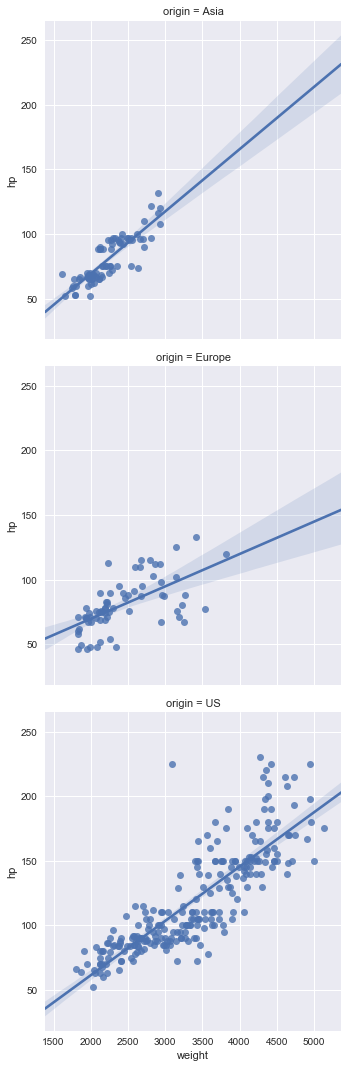

In [12]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight',y='hp', data=auto, row='origin')

# Display the plot
plt.show()


# Visualizing Univariate Distributions

In [13]:
print(auto.head(3))
print('\n\n========================================\n\n')
print(auto.info())

    mpg  cyl  displ   hp  weight  accel  yr origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71     US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70     US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78   Asia  honda civic cvcc   blue   

        size marker   make  
0  27.370336      o   ford  
1  62.199511      o     hi  
2   9.000000      x  honda  




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 13 columns):
mpg       392 non-null float64
cyl       392 non-null int64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
yr        392 non-null int64
origin    392 non-null category
name      392 non-null object
color     392 non-null category
size      392 non-null float64
marker    392 non-null category
make      392 non-null category
dtypes: category(4), float64(4), int64(4), object(1)
memory 

# Constructing Strip Plots

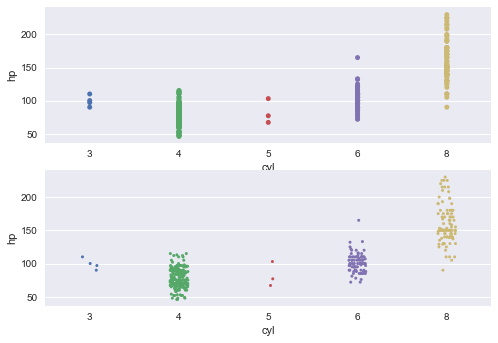

In [14]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl',y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show()


# Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

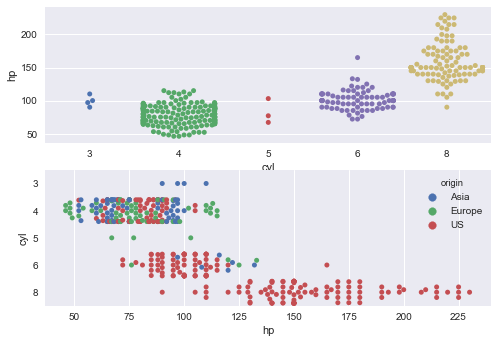

In [15]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl',y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin',orient='h')

# Display the plot
plt.show()


# Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

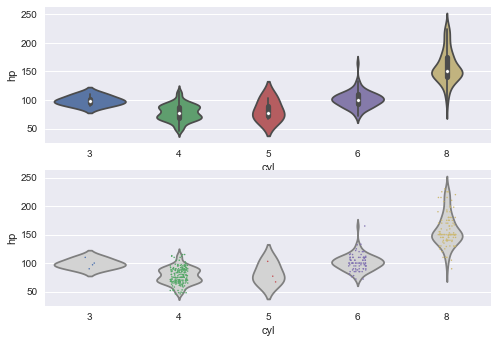

In [16]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, color='lightgray', inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show()

# Plotting joint distributions (1)
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

* A scatter plot using the specified columns x and y from the DataFrame data.
* A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
* A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

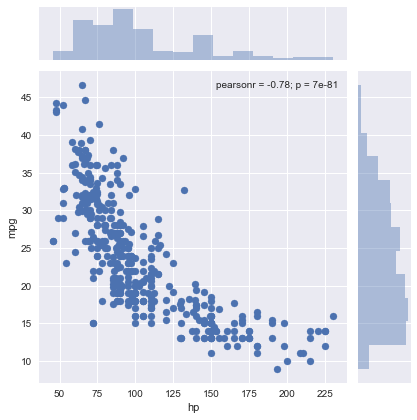

In [17]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()


# Plotting joint distributions (2)

The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

* **kind='scatter'** uses a scatter plot of the data points
* **kind='reg'** uses a regression plot (default order 1)
* **kind='resid'** uses a residual plot
* **kind='kde'** uses a kernel density estimate of the joint distribution
* **kind='hex'** uses a hexbin plot of the joint distribution

For this exercise, you will again use sns.jointplot() to display the joint distribution of the hp and mpg columns of the auto DataFrame. This time, you will use kind='hex' to generate a hexbin plot of the joint distribution.

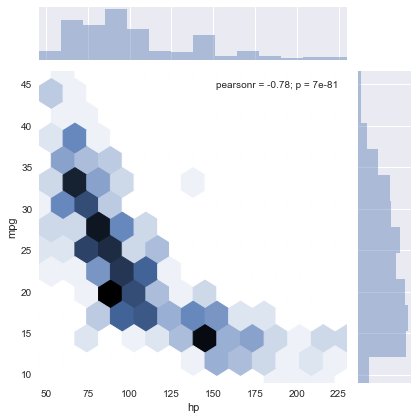

In [18]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()


# Plotting distributions pairwise (1)
Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame auto comprising only three columns from the original auto-mpg data set.

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker   make  
0  27.370336      o   ford  
1  62.199511      o     hi  
2   9.000000      x  honda  
3  34.515625      o   ford  
4  13.298178      s   audi  


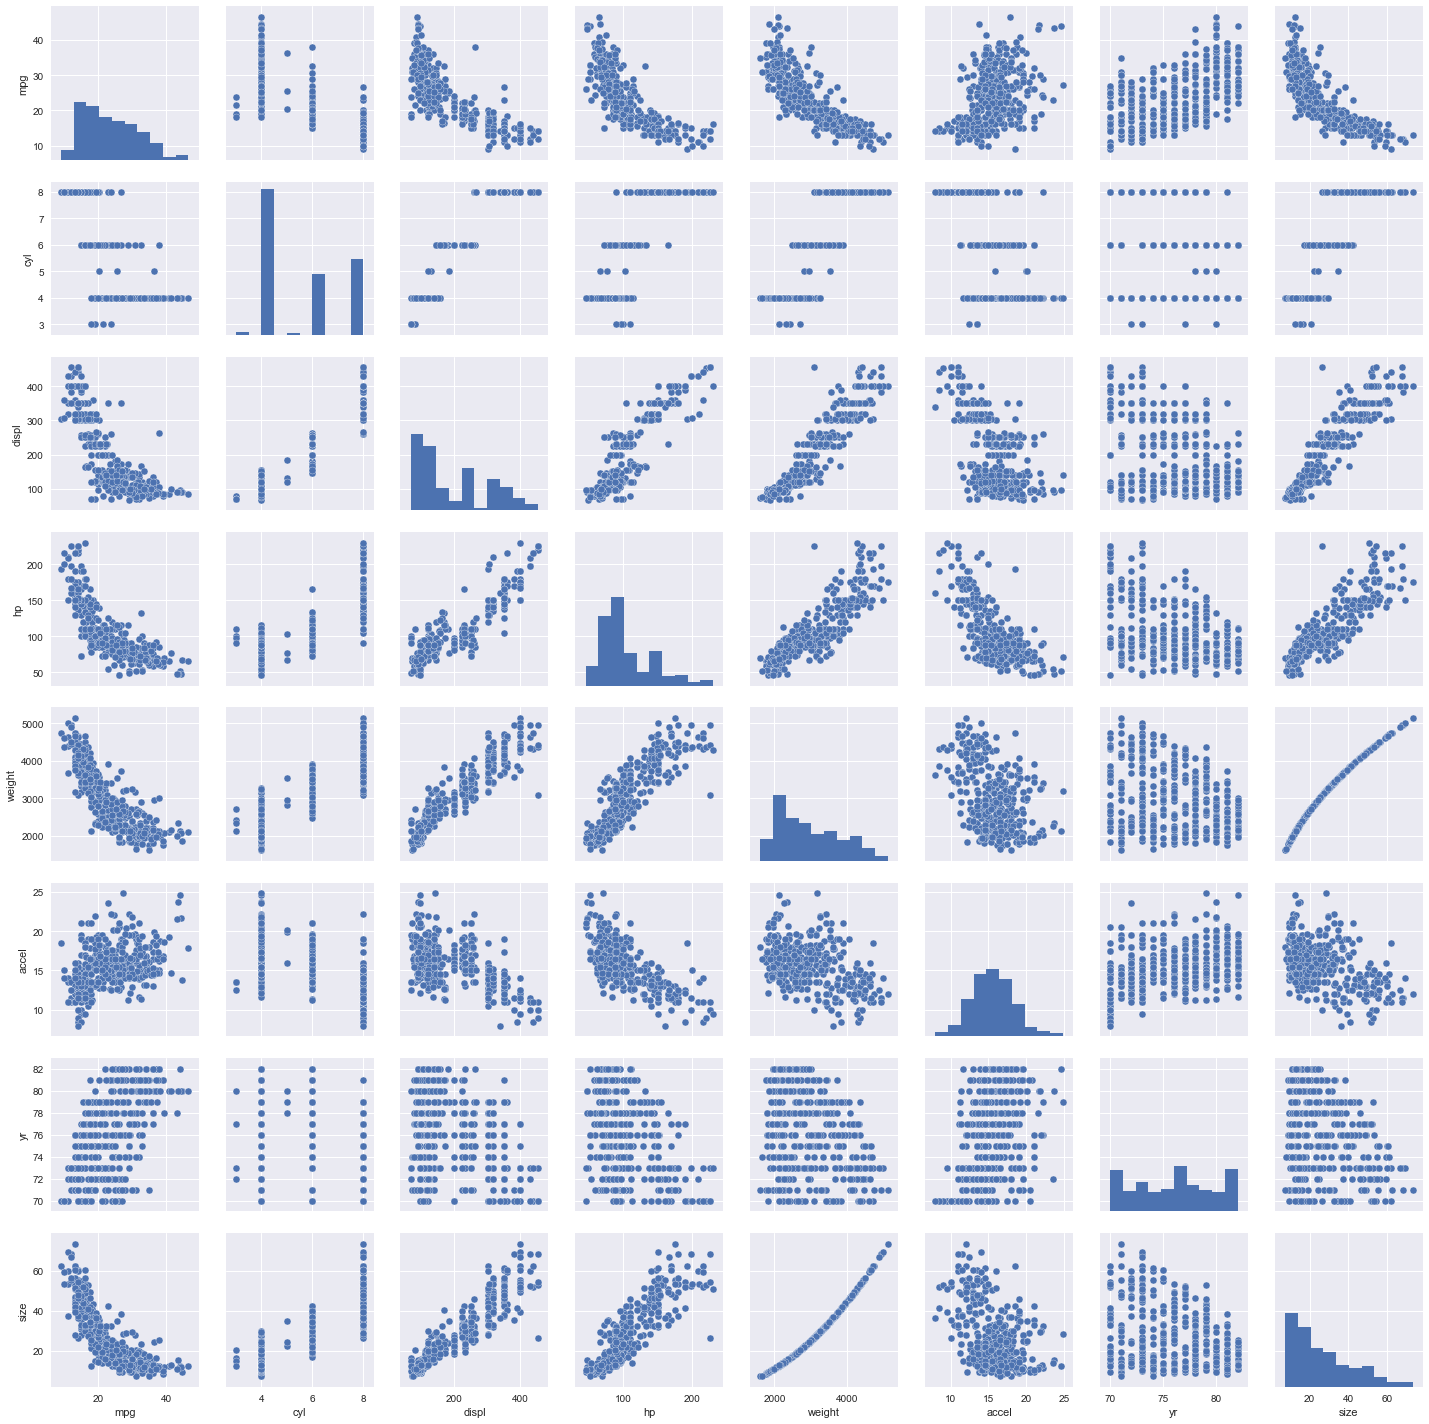

In [19]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto)

# Display the plot
plt.show()


# Plotting distributions pairwise (2)
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

* You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument kind='reg' (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
* You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

    mpg  cyl  displ   hp  weight  accel  yr  origin              name  color  \
0  18.0    6  250.0   88    3139   14.5  71      US      ford mustang    red   
1   9.0    8  304.0  193    4732   18.5  70      US          hi 1200d  green   
2  36.1    4   91.0   60    1800   16.4  78    Asia  honda civic cvcc   blue   
3  18.5    6  250.0   98    3525   19.0  77      US      ford granada    red   
4  34.3    4   97.0   78    2188   15.8  80  Europe         audi 4000   blue   

        size marker   make  
0  27.370336      o   ford  
1  62.199511      o     hi  
2   9.000000      x  honda  
3  34.515625      o   ford  
4  13.298178      s   audi  


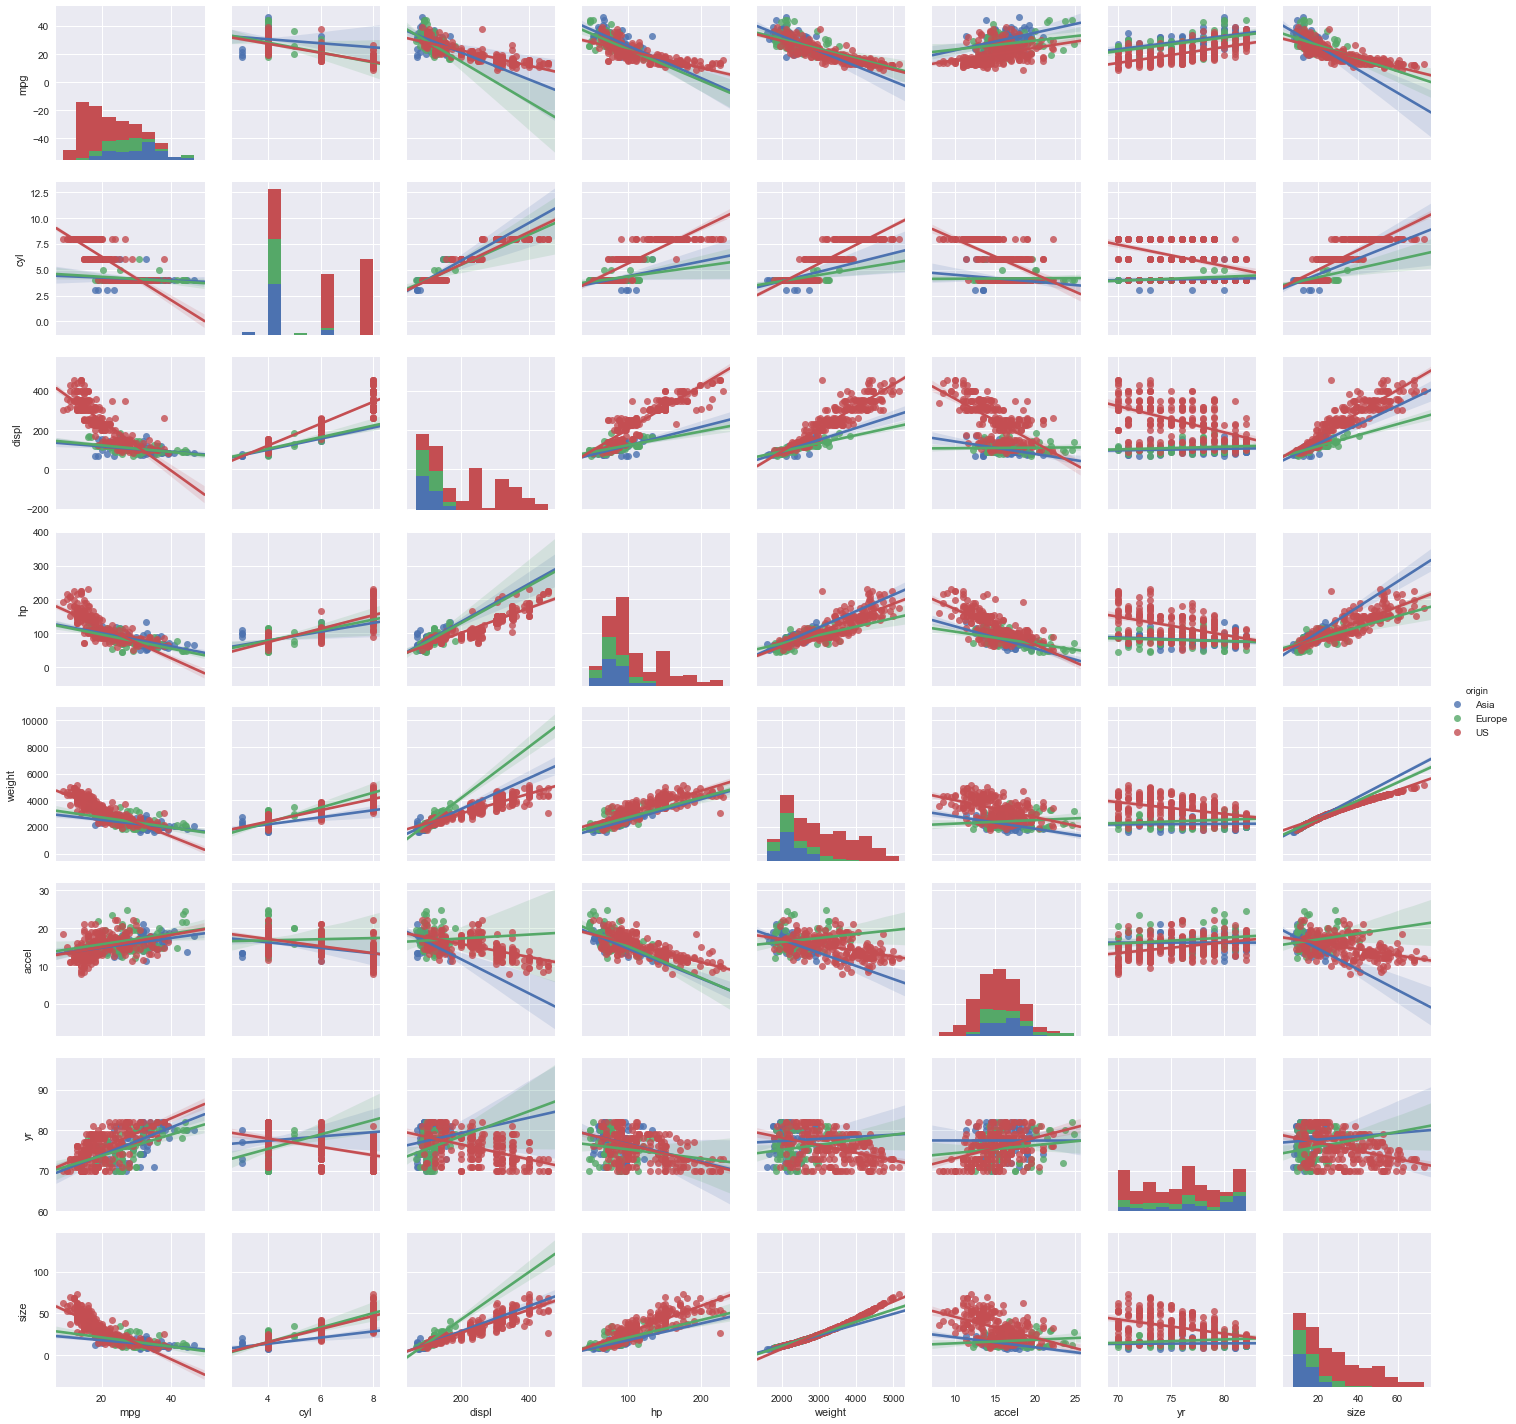

In [20]:
# Print the first 5 rows of the DataFrame
print(auto.head())

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto, kind='reg', hue='origin')

# Display the plot
plt.show()


# Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

### Creat a covariance matrix from pandas
#### pandas.DataFrame.cov
cov_matrix = auto.cov()

In [21]:
cov_matrix = auto.cov()

                mpg          cyl         displ            hp         weight  \
mpg       60.918142   -10.352928   -657.585207   -233.857926   -5517.440704   
cyl      -10.352928     2.909696    169.721949     55.348244    1300.424363   
displ   -657.585207   169.721949  10950.367554   3614.033744   82929.100139   
hp      -233.857926    55.348244   3614.033744   1481.569393   28265.620231   
weight -5517.440704  1300.424363  82929.100139  28265.620231  721484.709008   
accel      9.115514    -2.375052   -156.994435    -73.186967    -976.815253   
yr        16.691477    -2.171930   -142.572133    -59.036432    -967.228457   
size     -95.753891    23.110219   1478.112751    509.121366   12814.879225   

             accel          yr          size  
mpg       9.115514   16.691477    -95.753891  
cyl      -2.375052   -2.171930     23.110219  
displ  -156.994435 -142.572133   1478.112751  
hp      -73.186967  -59.036432    509.121366  
weight -976.815253 -967.228457  12814.879225  
accel 

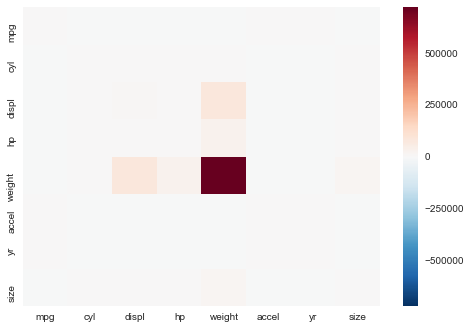

In [22]:
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show()
